In [1]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from matplotlib import pyplot as plt

In [2]:
my_SIFT_instance = cv.SIFT_create()

In [3]:
img1 = cv.imread("backpack_right.png")
img2 = cv.imread("backpack_left.png")

In [21]:
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
out1 = np.zeros((img1.shape))
out1 = cv.drawKeypoints(img1, kp1, out1)
out2 = np.zeros((img2.shape))
out2 = cv.drawKeypoints(img2, kp2, out2)

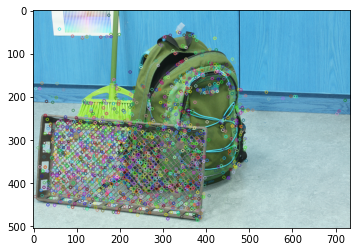

In [22]:
plt.imshow(out1)

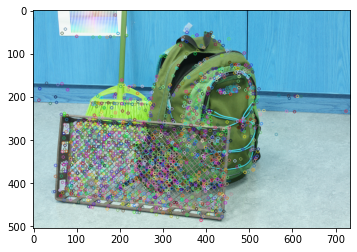

In [23]:
plt.imshow(out2)

# Brute Force Matcher

In [81]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
testBF = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None)

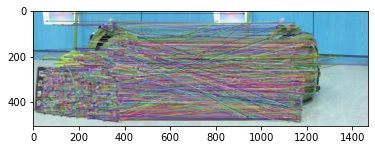

In [82]:
plt.imshow(testBF)

## Lowe's Ratio Test

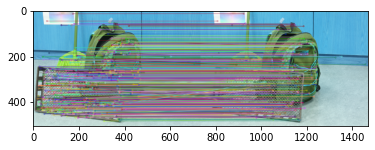

In [83]:
good = []
for m,n in matches:
    if(m.distance < 0.75*n.distance):
        good.append([m])

img3BF = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3BF)

# Histogram

In [84]:
allmatches = dict()
for m,n in matches:
    if(not (round(m.distance) in allmatches)):
        allmatches[round(m.distance)] = 1
    else:
        allmatches[round(m.distance)] += 1
lowematches = dict()
for m in good:
    if(not (round(m[0].distance) in lowematches)):
        lowematches[round(m[0].distance)] = 1
    else:
        lowematches[round(m[0].distance)] += 1

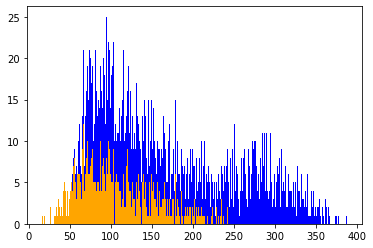

In [85]:
plt.bar(allmatches.keys(), allmatches.values(), 1, color='b')
plt.bar(lowematches.keys(), lowematches.values(), 1, color='orange')
plt.show()

# FLANN Matcher

In [76]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)


In [77]:
matchesMask = [[0,0] for i in range(len(matches))]
for i,(m,n) in enumerate(matches):
    if(m.distance < 0.7*n.distance):
        matchesMask[i] = [1,0]

draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0)

img3Flann = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

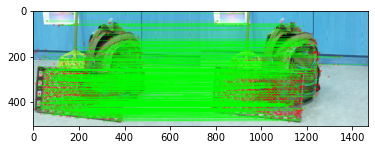

In [78]:
plt.imshow(img3Flann)

# Histogram

In [79]:
allmatches = dict()
for m,n in matches:
    if(not (round(m.distance) in allmatches)):
        allmatches[round(m.distance)] = 1
    else:
        allmatches[round(m.distance)] += 1
lowematches = dict()
for m in good:
    if(not (round(m[0].distance) in lowematches)):
        lowematches[round(m[0].distance)] = 1
    else:
        lowematches[round(m[0].distance)] += 1

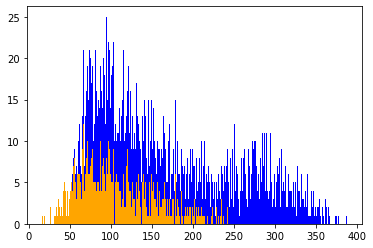

In [80]:
plt.bar(allmatches.keys(), allmatches.values(), 1, color='b')
plt.bar(lowematches.keys(), lowematches.values(), 1, color='orange')
plt.show()